Project_name: sales Data analysis

requirement: analyse the given data properly and find out who is spending more money to do shopping in case of gender, age group, marital_status, state, occupation on which  product category.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('sales_data.csv',encoding='ISO-8859-1')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.shape

(11251, 15)

In [ ]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
#droping status and unnamed1
df.drop(['Status','unnamed1'],axis=1,inplace=True)
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [ ]:
#droping a nan values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [ ]:
#replacinf f as female and m as male by using map()
d={'F':'Female','M':'Male'}
df['Gender']=df['Gender'].map(d)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [ ]:
#replacing marital_status as 0 for unmarried and 1 for married
df['Marital_Status']=df['Marital_Status'].map({0:'Unmarried',1:'Married'})
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [ ]:
#dropping age column as it is not necessary
df.drop('Age',axis=1,inplace=True)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


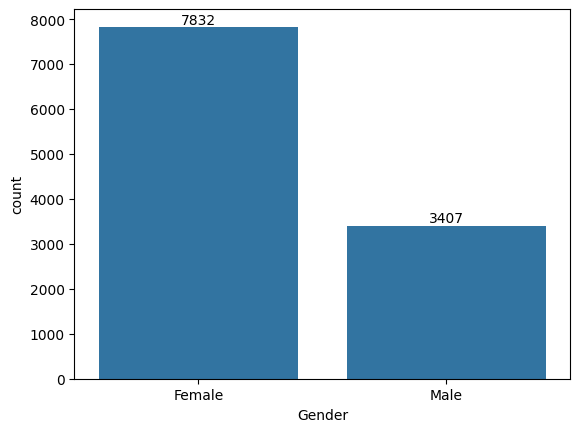

In [ ]:
#plotting a graph to know number of males and females
a=sns.countplot(x='Gender',data=df)
for i in a.containers:
    a.bar_label(i)

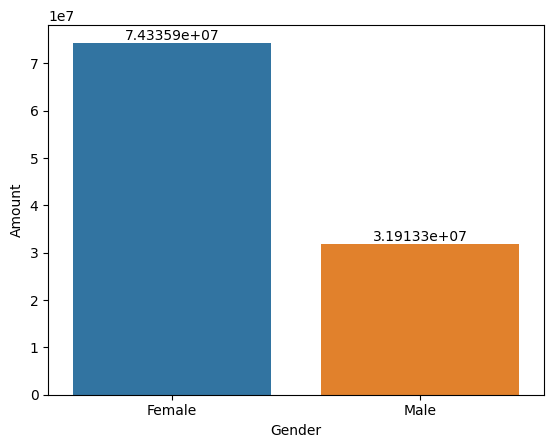

In [ ]:
b=df.groupby('Gender')['Amount'].sum()
b=pd.DataFrame(b)
a=sns.barplot(x='Gender',y='Amount',data=b,hue='Gender')
for i in a.containers:
    a.bar_label(i)

based on the above analysis females are spending more amount on shopping.

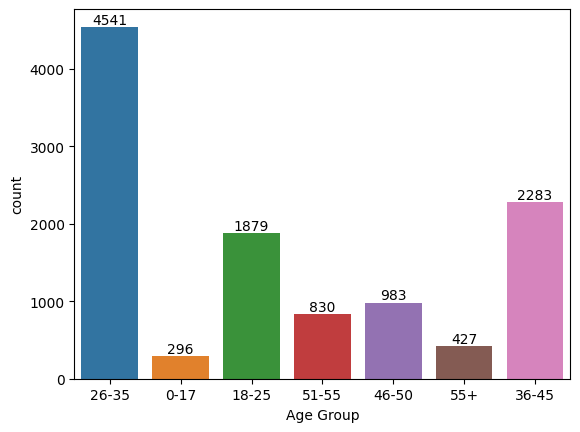

In [ ]:
a=sns.countplot(x='Age Group',data=df,hue='Age Group')
for i in a.containers:
    a.bar_label(i)

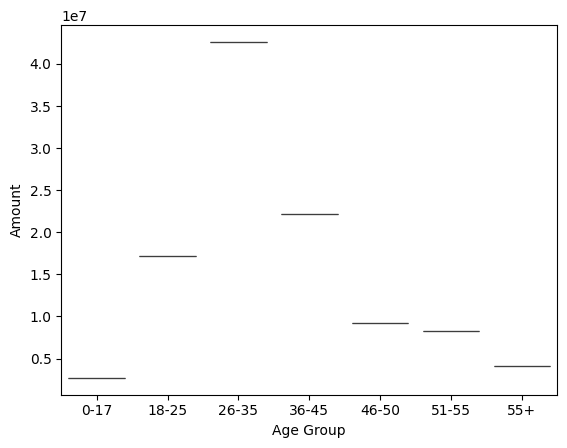

In [ ]:
b=df.groupby('Age Group')['Amount'].sum()
b=pd.DataFrame(b)
a=sns.boplot(x='Age Group',y='Amount',data=b,hue='Age Group')
for i in a.containers:
    a.bar_label(i)

based on the above analysis we can conclude that the age group between 26-35 will spending more amount on the shopping.

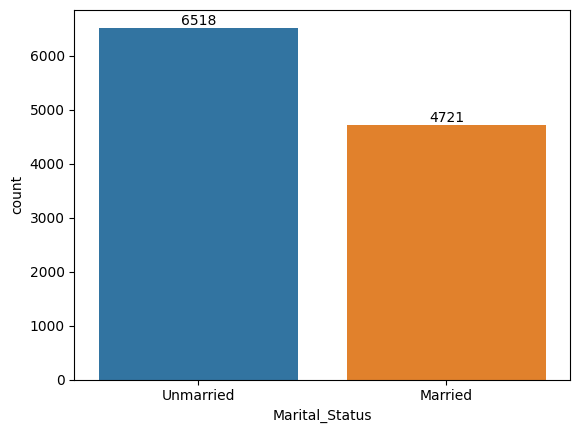

In [ ]:
a=sns.countplot(x='Marital_Status',data=df,hue='Marital_Status')
for i in a.containers:
    a.bar_label(i)

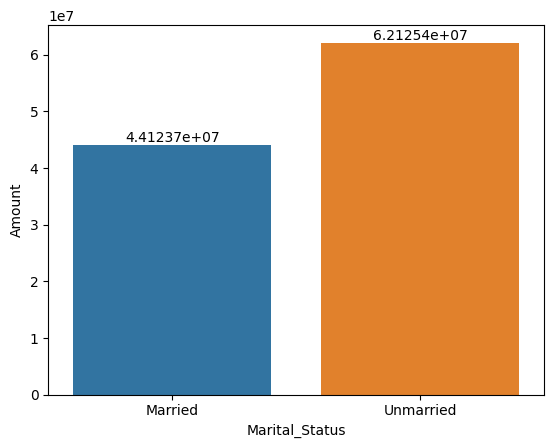

In [ ]:
b=df.groupby('Marital_Status')['Amount'].sum()
b=pd.DataFrame(b)
a=sns.barplot(x='Marital_Status',y='Amount',data=b,hue='Marital_Status')
for i in a.containers:
    a.bar_label(i)

based on the above analysis we can conclude that unmarried will spend more amount on shopping.

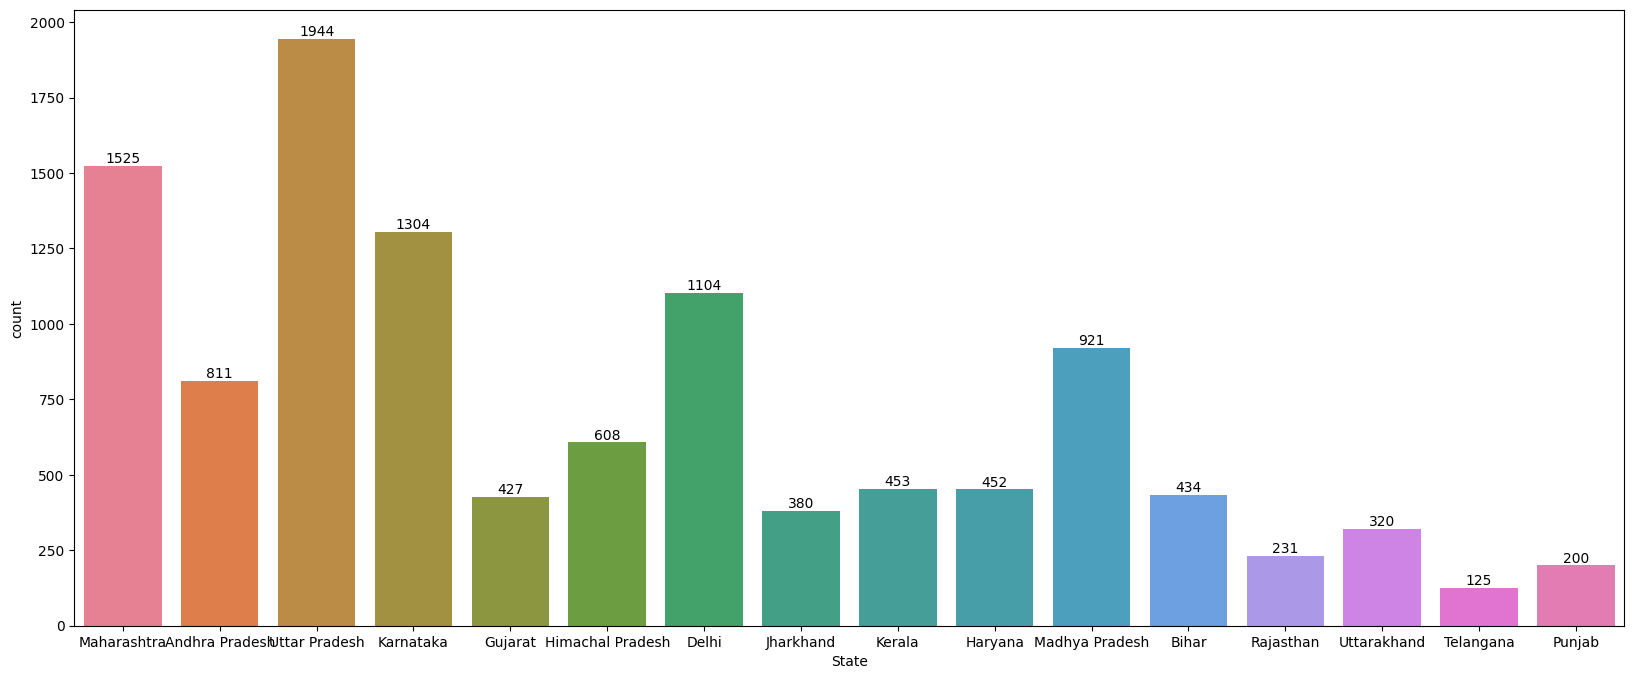

In [ ]:
plt.figure(figsize=(20,8))

a=sns.countplot(x='State',data=df,hue='State')
for i in a.containers:
    a.bar_label(i)

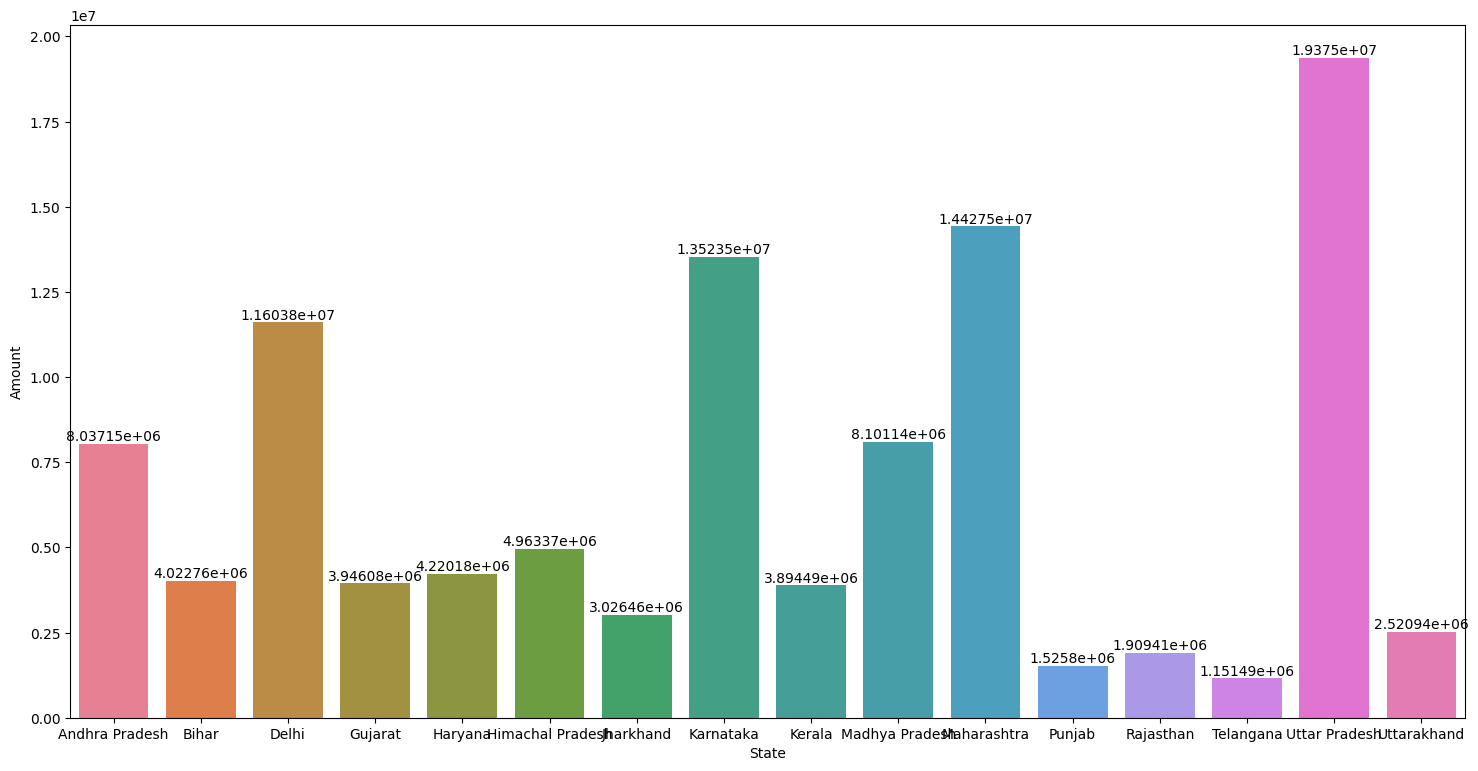

In [ ]:
plt.figure(figsize=(18,9))
b=df.groupby('State')['Amount'].sum()
b=pd.DataFrame(b)
a=sns.barplot(x='State',y='Amount',data=b,hue='State')
for i in a.containers:
    a.bar_label(i)

by the above analysis we can conclude that uttar pradesh people spend more amount on shopping.

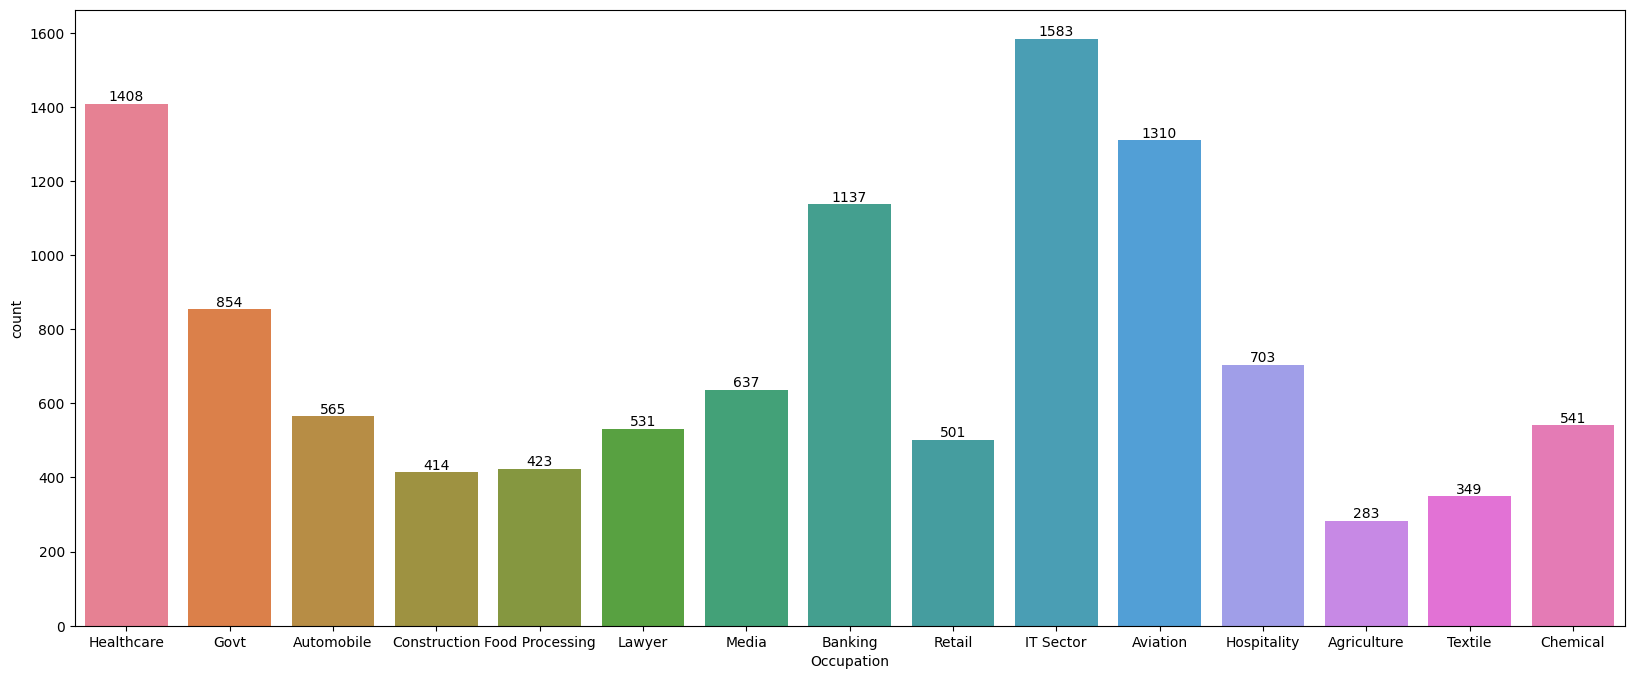

In [ ]:
plt.figure(figsize=(20,8))

a=sns.countplot(x='Occupation',data=df,hue='Occupation')
for i in a.containers:
    a.bar_label(i)

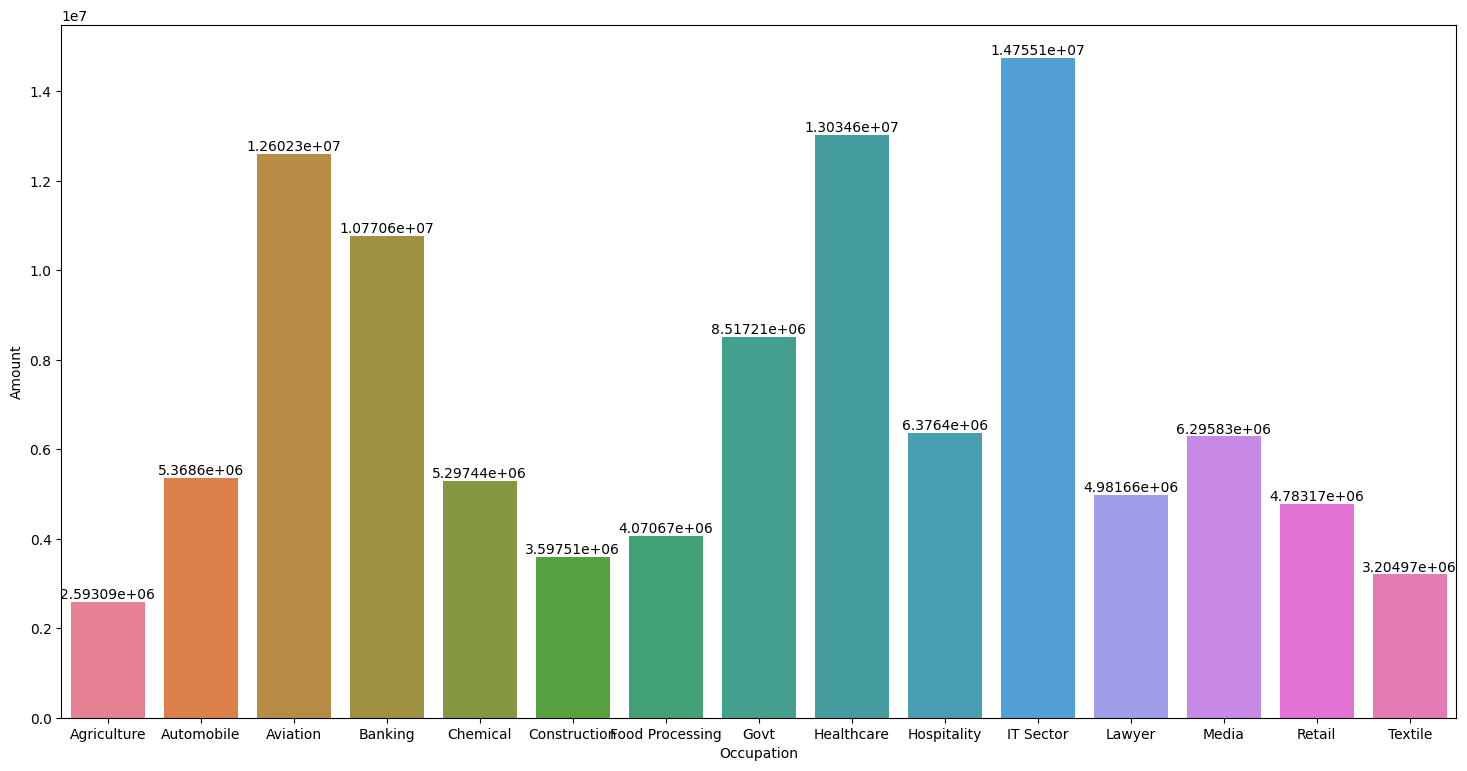

In [ ]:
plt.figure(figsize=(18,9))
b=df.groupby('Occupation')['Amount'].sum()
b=pd.DataFrame(b)
a=sns.barplot(x='Occupation',y='Amount',data=b,hue='Occupation')
for i in a.containers:
    a.bar_label(i)

based on the above analysis we can conclude that IT sector people spend more amount on the shopping.

conclusion: based on the above analysis i can conclude that unmarried females with age group of 26-35 years working in IT sector, healthcare and aviation from Uttar pradesh,Maharastra,Karnataka are spending more money on food item, electronic gadgets and clothing.